In [186]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from sklearn.metrics import classification_report

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
plt.rcParams.update({'font.size': 12})

# Load data

In [2]:
data = pd.read_csv('data/processed_data.csv')

In [3]:
data.shape

(1756, 38)

In [4]:
def round_to_half(x):
    return round(round(x * 2) / 2, 1)

def round_to_nearest_01(x):
    return round(round(x / 0.1) * 0.1, 1)


data['Indoor Temp (Rounded to Nearest 0.5)'] = data['Indoor Temp'].apply(round_to_half)
data['Air Velocity (Rounded to Nearest 0.1)'] = data['Air Velocity'].apply(round_to_nearest_01)

data.head()

,Timestamp,User Id,Condition,Survey Type,Mode,Off Coil Temp,Outdoor Air RH,Outdoor Air Temp,Return Air CO2,Return Air RH,Return Air Temp,Supply Air CO2,Supply Air RH,Supply Air Temp,BTU Cooling Load,MainLine Power,AHU Power,Fan Power,Outdoor Humidity,Outdoor PM1,Outdoor PM10,Outdoor PM2.5,Outdoor Pressure,Outdoor Temp,Air Velocity,Indoor CO2,Indoor Humidity,Indoor Lux,Indoor PM10,Indoor PM2.5,Indoor Sound,Indoor Temp,Indoor VOC,Globe Temperature,Thermal Preference,Air Movement Preference,Thermal Acceptability,DateTime,Indoor Temp (Rounded to Nearest 0.5),Air Velocity (Rounded to Nearest 0.1)
0,6/20/22 9:06,1,2,Watch 1,AC,20.133654,88.05157,27.204983,718.7729,68.1084,27.249247,495.186035,71.09089,21.330507,5284.89551,568.308533,126.643692,20.0,73.0,7.1,11.0,10.5,1010.6,83.0,0.53,662.801282,78.84082,256.874511,4.636221,3.389804,55.485258,26.224357,20.0,27.35,No Change,No Change,Acceptable,2022-06-20 09:06:00,26.0,0.5
1,6/20/22 9:06,2,2,Watch 1,AC,20.133654,88.05157,27.204983,718.7729,68.1084,27.249247,495.186035,71.09089,21.330507,5284.89551,568.308533,126.643692,20.0,73.0,7.1,11.0,10.5,1010.6,83.0,0.53,662.801282,78.84082,256.874511,4.636221,3.389804,55.485258,26.224357,20.0,27.35,Cooler,No Change,Acceptable,2022-06-20 09:06:00,26.0,0.5
2,6/20/22 9:06,4,2,Watch 1,AC,20.133654,88.05157,27.204983,718.7729,68.1084,27.249247,495.186035,71.09089,21.330507,5284.89551,568.308533,126.643692,20.0,73.0,7.1,11.0,10.5,1010.6,83.0,0.53,662.801282,78.84082,256.874511,4.636221,3.389804,55.485258,26.224357,20.0,27.35,No Change,No Change,Acceptable,2022-06-20 09:06:00,26.0,0.5
3,6/20/22 9:06,5,2,Watch 1,AC,20.133654,88.05157,27.204983,718.7729,68.1084,27.249247,495.186035,71.09089,21.330507,5284.89551,568.308533,126.643692,20.0,73.0,7.1,11.0,10.5,1010.6,83.0,0.53,662.801282,78.84082,256.874511,4.636221,3.389804,55.485258,26.224357,20.0,27.35,Cooler,More,Unacceptable,2022-06-20 09:06:00,26.0,0.5
4,6/20/22 9:06,6,2,Watch 1,AC,20.133654,88.05157,27.204983,718.7729,68.1084,27.249247,495.186035,71.09089,21.330507,5284.89551,568.308533,126.643692,20.0,73.0,7.1,11.0,10.5,1010.6,83.0,0.53,662.801282,78.84082,256.874511,4.636221,3.389804,55.485258,26.224357,20.0,27.35,Cooler,More,Acceptable,2022-06-20 09:06:00,26.0,0.5


# Analysis

## Thermal Comfort

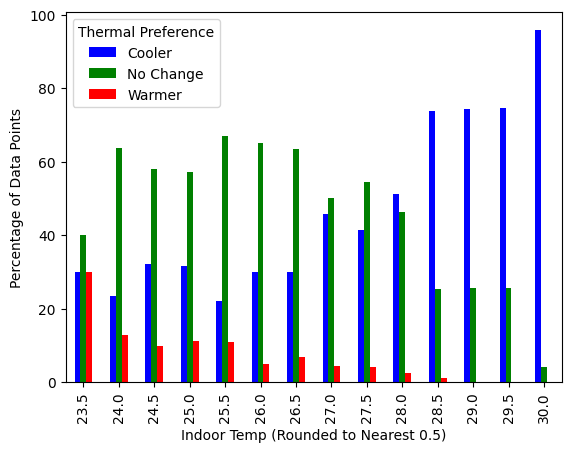

In [5]:
# Thermal Preference vs Indoor Temperature (rounded to nearest 0.5)
grouped = data.groupby('Indoor Temp (Rounded to Nearest 0.5)')['Thermal Preference'].value_counts(normalize=True).unstack(fill_value=0)
grouped = grouped * 100

# Plot the results on the same graph
colors = ['blue', 'green', 'red']
grouped.plot.bar(y=['Cooler', 'No Change', 'Warmer'], color=colors)
plt.ylabel("Percentage of Data Points")
plt.show()

Interpretation
- Percentage of instances where people reported a preference for a "Warmer" temperature (represented by red bars) decreases as the indoor temperature increases. Peaks at 23.5 degree celsius.
- Percentage of instances where people reported a preference for "No Change" in temperature (represented by green bars) peaks at around 25.5 degree celsius and decreases when indoor temperature continues to increase or decrease.
- Percentage of instances where people reported a preference for a "Cooler" temperature (represented by blue bars) increases as the indoor temperature increases. Peaks at 30 degree celsius.
- The flip in thermal preferences from majority "No Change" to majority "Cooler" happens at around 28 degree celsius

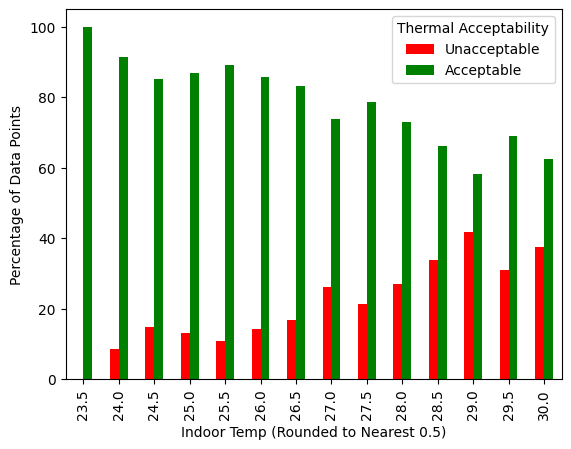

In [6]:
## Thermal Acceptability vs Indoor Temperature (rounded to nearest 0.5)
grouped = data.groupby('Indoor Temp (Rounded to Nearest 0.5)')['Thermal Acceptability'].value_counts(normalize=True).unstack(fill_value=0)
grouped = grouped * 100

# Plot the results on the same graph
colors = ['red', 'green']
grouped.plot.bar(y=['Unacceptable', 'Acceptable'], color=colors)
# grouped.plot.bar()
plt.ylabel("Percentage of Data Points")
plt.show()

Interpretation
- Percentage of instances where people reported that the current temperature is "Unacceptable" (represented by red bars) increases as the indoor temperature increases. Peaks at 29 degree celsius.
- Percentage of instances where people reported that the current temperature is "Acceptable" (represented by green bars) peaks at 23.5 degree celsius and generally decreases when indoor temperature continues to increase.
- The flip in the occupants' thermal acceptability from majority "Acceptable" to majority "Unacceptable" does not happen between 23.5-29 degree celsius, unlike in the case where occupants are reporting their thermal preference. This might indicate a much larger tolerance range when occupants are reporting their thermal acceptability as compared to thermal preference. In other words, "I find this temperature acceptable but it will be great if the temperature can be warmer/cooler".

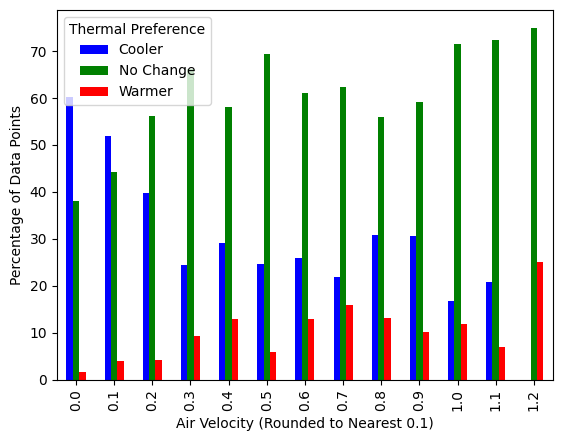

In [7]:
# Thermal Preference vs Air Velocity (rounded to nearest 0.1)
grouped = data.groupby('Air Velocity (Rounded to Nearest 0.1)')['Thermal Preference'].value_counts(normalize=True).unstack(fill_value=0)
grouped = grouped * 100
grouped = grouped.iloc[:13]

# Plot the results on the same graph
colors = ['blue', 'green', 'red']
grouped.plot.bar(y=['Cooler', 'No Change', 'Warmer'], color=colors)
plt.ylabel("Percentage of Data Points")
plt.show()

Interpretation
- Percentage of instances where people reported a preference for a "Warmer" temperature (represented by red bars) increases as the air velocity increases.
- Percentage of instances where people reported a preference for "No Change" in temperature (represented by green bars) generally increases when air velocity increases.
- Percentage of instances where people reported a preference for a "Cooler" temperature (represented by blue bars) decreases as the air velocity increases. Peaks when air velocity is at 0.0m/s.
- The flip in the thermal preferences from majority "Cooler" to majority "No Change" happens when air velocity increases beyond 0.2m/s

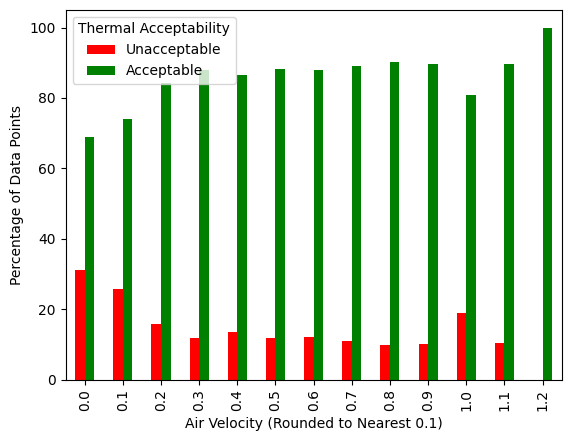

In [8]:
# Thermal Acceptability vs Air Velocity (rounded to nearest 0.1)
grouped = data.groupby('Air Velocity (Rounded to Nearest 0.1)')['Thermal Acceptability'].value_counts(normalize=True).unstack(fill_value=0)
grouped = grouped * 100
grouped = grouped.iloc[:13]

# Plot the results on the same graph
colors = ['red', 'green']
grouped.plot.bar(y=['Unacceptable', 'Acceptable'], color=colors)
# grouped.plot.bar()
plt.ylabel("Percentage of Data Points")
plt.show()

Interpretation
- Percentage of instances where people reported that the current thermal acceptability is "Unacceptable" (represented by red bars) decreases as the air velocity increases. Peaks at 0m/s.
- Percentage of instances where people reported that the current thermal acceptability is "Acceptable" (represented by green bars) peaks at 30.0 degree celsius and generally increases when the air velocity in the room continues to increase.
- The flip in the occupants' thermal acceptability from majority "Acceptable" to majority "Unacceptable" does not happen when air velocity is between 0-1.2m/s, unlike in the case where occupants are reporting their thermal preference. This might indicate a much larger tolerance range when occupants are reporting their thermal acceptability as compared to thermal preference. In other words, "I find this air velocity acceptable but it will be great if it can be increased".

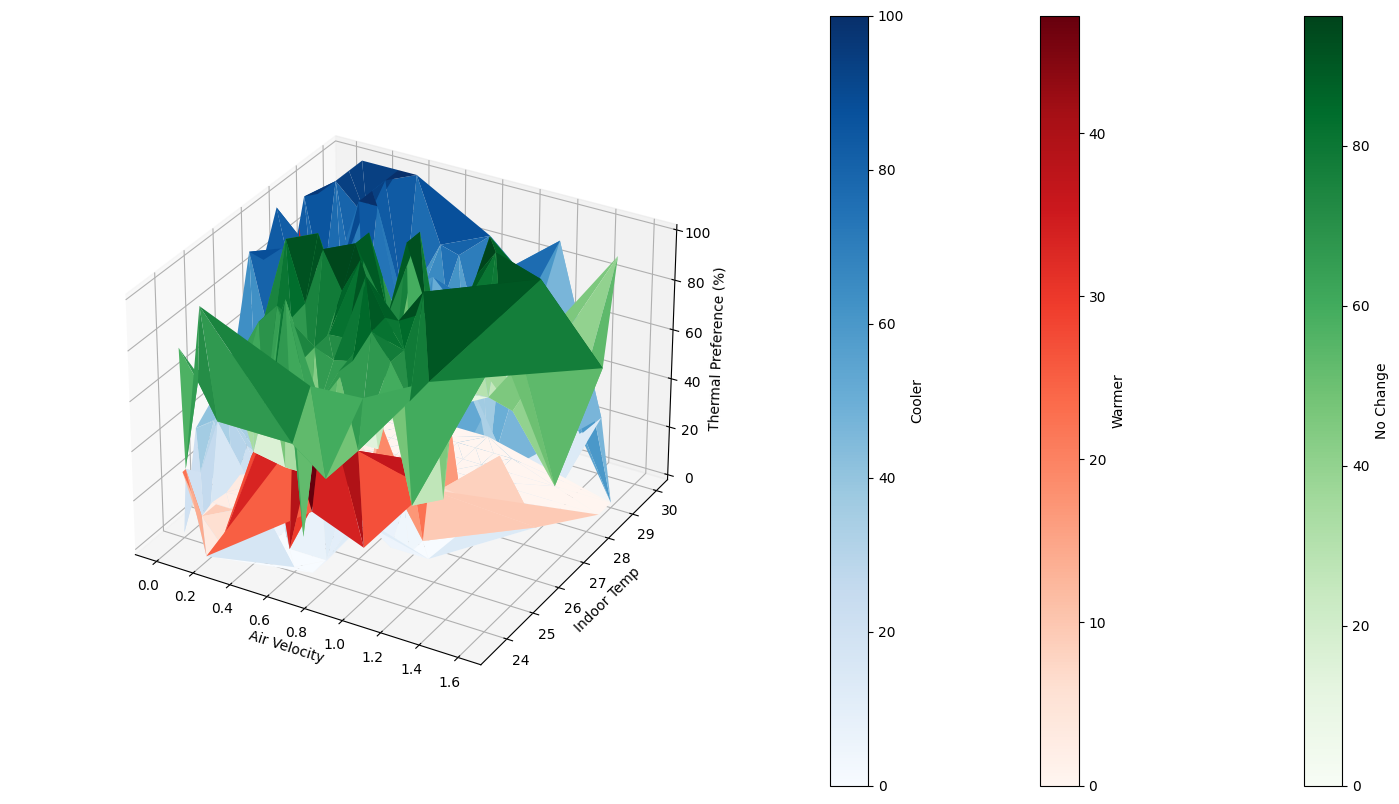

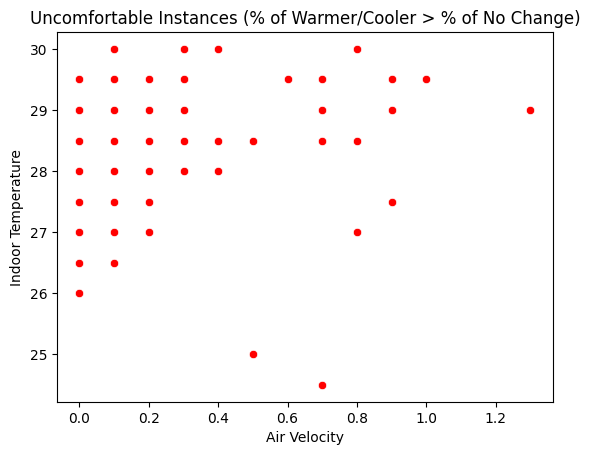

In [9]:
# Thermal Preference vs Indoor Temperature vs Air Velocity

grouped = data.groupby(['Indoor Temp (Rounded to Nearest 0.5)', 
                        'Air Velocity (Rounded to Nearest 0.1)'])['Thermal Preference'].value_counts(normalize=True).unstack(fill_value=0)
grouped = grouped * 100
grouped = grouped.reset_index()
grouped['Warmer/Cooler > No Change'] = grouped.apply(lambda x: 1 
                                                     if (x['Warmer'] > x['No Change'] or x['Cooler'] > x['No Change']) 
                                                     else 0, axis=1)

# # Plot the 3D plot using Seaborn and Matplotlib
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect(aspect=None, zoom=0.8)

surf_nochange = ax.plot_trisurf(grouped['Air Velocity (Rounded to Nearest 0.1)'], 
                                    grouped['Indoor Temp (Rounded to Nearest 0.5)'], 
                                    grouped['No Change'], cmap='Greens')
cbar = fig.colorbar(surf_nochange, ax=ax, label='No Change')

surf_warmer = ax.plot_trisurf(grouped['Air Velocity (Rounded to Nearest 0.1)'], 
                                  grouped['Indoor Temp (Rounded to Nearest 0.5)'], 
                                  grouped['Warmer'], cmap='Reds')
cbar = fig.colorbar(surf_warmer, ax=ax, label='Warmer')

surf_cooler = ax.plot_trisurf(grouped['Air Velocity (Rounded to Nearest 0.1)'], 
                                  grouped['Indoor Temp (Rounded to Nearest 0.5)'], 
                                  grouped['Cooler'], cmap='Blues')
cbar = fig.colorbar(surf_cooler, ax=ax, label='Cooler')

ax.set_zlabel('Thermal Preference (%)')
ax.set_ylabel('Indoor Temp')
ax.set_xlabel('Air Velocity')
plt.show()

# filter out scenarios where % of Warmer / Cooler > % of No Change
plt.title('Uncomfortable Instances (% of Warmer/Cooler > % of No Change)')
sns.scatterplot(data=grouped[grouped['Warmer/Cooler > No Change'] == 1], 
                y='Indoor Temp (Rounded to Nearest 0.5)', 
                x='Air Velocity (Rounded to Nearest 0.1)', 
                color='red')
plt.ylabel('Indoor Temperature')
plt.xlabel('Air Velocity')
plt.show()


Interpretation
- 3D figure shows how the occupants' thermal preferences change based on different air velocities and indoor temperature
- There are very few occurences (only 2 out of 45) when the occupants are uncomfortable where the majority of the reported preferences is "Warmer" as compared to "Cooler". This means that occupants are more likely to report that they want the temperature to be decreased as compared to wanting the temperature to be increased when they are uncomfortable. This could be due to the occupants' ability to easily increase their own bodies' temperature by putting on a jacket. However, there is little they can do to reduce their own body temperature. 
- The time where the majority of the instances reported a "Cooler" thermal preference (over "No Change") happens when the air velocity is low (<0.4m/s) and when indoor temperature is high (>28 degree celsius). 
- Based on the scatter plot, we can observe that occupants starts to feel uncomfortable when temperature raises to around 26 degree celsius and air velocity is low (still comfortable at higher air velocities). However, as the indoor temperature continues to raise, occupants start reporting that they are uncomfortable even at high velocities.
- From this, we can draw a diagonal boundary upwards from left to right to divide between the "Comfortable" region (below the boundary) from the "Uncomfortable" region (above the boundary). To determine an optimal setting between temperature set point (which affects indoor temperature) and fan speed (which affects air velocity), you can consider the energy consumption patterns along this boundary and identify the point where energy consumption is lowest.

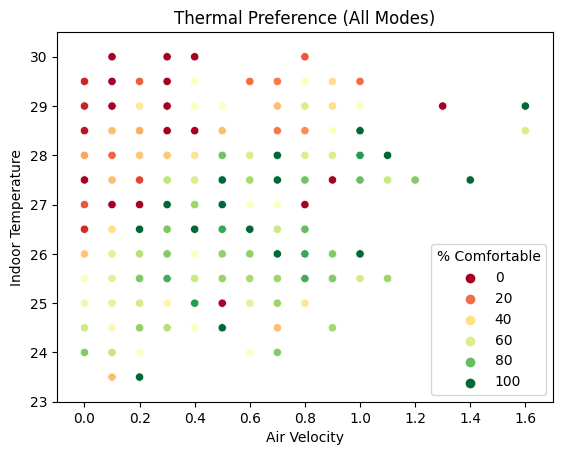

In [10]:
# Contour map for thermal preference based on indoor temperature and air velocity
# for all conditions
grouped = data.groupby(['Indoor Temp (Rounded to Nearest 0.5)', 
                        'Air Velocity (Rounded to Nearest 0.1)'])['Thermal Preference'].value_counts(normalize=True).unstack(fill_value=0)
grouped = grouped * 100
grouped = grouped.reset_index()
grouped['% Uncomfortable'] = grouped['Cooler'] + grouped['Warmer']
grouped['% Comfortable'] = grouped['No Change']


# scatter plot
sns.scatterplot(data=grouped, 
                y='Indoor Temp (Rounded to Nearest 0.5)', 
                x='Air Velocity (Rounded to Nearest 0.1)', 
                hue='% Comfortable', palette='RdYlGn')
plt.title('Thermal Preference (All Modes)')
plt.ylabel('Indoor Temperature')
plt.xlabel('Air Velocity')
plt.xlim(-0.1, 1.7)
plt.ylim(23, 30.5)
plt.show()


In [11]:
# # Contour map for thermal preference based on indoor temperature and air velocity
# # for NV condition
# # nv_data = data[data['Mode']=='NV'].reset_index(drop=True)
# # grouped = nv_data.groupby(['Indoor Temp (Rounded to Nearest 0.5)', 
# #                            'Air Velocity (Rounded to Nearest 0.1)'])['Thermal Preference'].value_counts(normalize=True).unstack(fill_value=0)
# # grouped = grouped * 100
# # grouped = grouped.reset_index()
# # grouped['% Uncomfortable'] = grouped['Cooler'] + grouped['Warmer']
# # grouped['% No Change'] = grouped['No Change']

# # sns.scatterplot(data=grouped, 
# #                 y='Indoor Temp (Rounded to Nearest 0.5)', 
# #                 x='Air Velocity (Rounded to Nearest 0.1)', 
# #                 hue='% No Change', palette='RdYlGn')
# # # plt.title('Thermal Preference (Only NV)')
# # plt.ylabel('Indoor temperature (°C, rounded to nearest 0.5 °C)')
# # plt.xlabel('Air velocity (m/s, rounded to nearest 0.1 m/s)')
# # plt.xlim(-0.1, 1.7)
# # plt.ylim(25, 30.5)
# # plt.savefig('figures/thermal_preference_nv.png', dpi=600, bbox_inches='tight')
# # plt.show()



# # Contour map for thermal preference based on indoor temperature and air velocity
# # for NV condition
# nv_data = data[data['Mode']=='NV'].reset_index(drop=True)
# grouped = nv_data.groupby(['Indoor Temp (Rounded to Nearest 0.5)', 
#                            'Air Velocity (Rounded to Nearest 0.1)'])['Thermal Preference'].value_counts(normalize=True).unstack(fill_value=0)
# grouped = grouped * 100
# grouped = grouped.reset_index()
# grouped['% Uncomfortable'] = grouped['Cooler'] + grouped['Warmer']
# grouped['% No Change'] = grouped['No Change']

# # plot decision boundary for 80% comfort threshold
# grouped['Comfort Threshold 80%'] = grouped['% No Change'].apply(lambda x: 1 if x >= 80 else 0)

# X = grouped[['Air Velocity (Rounded to Nearest 0.1)', 
#              'Indoor Temp (Rounded to Nearest 0.5)']]
# Y = grouped['Comfort Threshold 80%']

# ## Fit the logistic regression model
# logreg = LogisticRegression()
# logreg.fit(X, Y)

# temp_range = np.arange(25.5, 30.5, 0.5)
# velo_range = np.arange(0, 1.7, 0.1)
# xx, yy = np.meshgrid(velo_range, temp_range)

# Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
# Z = Z.reshape(xx.shape)

# plt.figure(figsize=(7,7))
# contour_80 = plt.contour(xx, yy, Z, levels=0, colors='black', linestyles='--')


# # plot decision boundary for 90% comfort threshold
# grouped['Comfort Threshold 90%'] = grouped['% No Change'].apply(lambda x: 1 if x >= 90 else 0)

# Y = grouped['Comfort Threshold 90%']

# ## Fit the logistic regression model
# logreg = LogisticRegression()
# logreg.fit(X, Y)

# Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
# Z = Z.reshape(xx.shape)

# contour_90 = plt.contour(xx, yy, Z, levels=0, colors='black', linestyles='-')

# # plot scatter plot
# sns.scatterplot(data=grouped, 
#                 y='Indoor Temp (Rounded to Nearest 0.5)', 
#                 x='Air Velocity (Rounded to Nearest 0.1)', 
#                 hue='% No Change', 
#                 s=100, 
#                 palette='RdYlGn')
# plt.ylabel('Indoor temperature (°C, rounded to nearest 0.5 °C)')
# plt.xlabel('Air velocity (m/s, rounded to nearest 0.1 m/s)')
# plt.xlim(-0.1, 1.65)
# plt.ylim(25.25, 30.25)

# # Get the current legend handles and labels
# handles, labels = plt.gca().get_legend_handles_labels()

# # Manually add a new item to the legend
# handles.append(Line2D([0], [0], color='black', linestyle='--'))
# labels.append('80% Threshold')

# handles.append(Line2D([0], [0], color='black', linestyle='-'))
# labels.append('90% Threshold')

# # Update the legend with the new items
# # plt.legend(handles, labels, title='% of "No Change"', loc='center left', bbox_to_anchor=(1, 0.5))
# plt.legend(handles, labels, title='% of "No Change"')

# # plt.savefig('figures/thermal_preference_nv.png', dpi=600, bbox_inches='tight')
# plt.show()



In [247]:
def fit_logreg_model(data, y_column):
    """
    Performs train test split on the data, fit a logistic regression model on training data and
    evaluate model performance based on test data.
    """
    data = data.sample(frac=1, random_state=1).reset_index(drop=True)
    
    logreg = LogisticRegression()
    logreg.fit(data[['Indoor Temp (Rounded to Nearest 0.5)', 'Air Velocity (Rounded to Nearest 0.1)']], 
               data[y_column])
    
    y_pred = logreg.predict(data[['Indoor Temp (Rounded to Nearest 0.5)', 'Air Velocity (Rounded to Nearest 0.1)']])
    print(y_column)
    print(classification_report(data[y_column], y_pred))
    
    return
    

Comfort Threshold 80%
              precision    recall  f1-score   support

           0       0.85      0.99      0.91        70
           1       0.83      0.29      0.43        17

    accuracy                           0.85        87
   macro avg       0.84      0.64      0.67        87
weighted avg       0.85      0.85      0.82        87

Comfort Threshold 90%
              precision    recall  f1-score   support

           0       0.86      1.00      0.92        73
           1       1.00      0.14      0.25        14

    accuracy                           0.86        87
   macro avg       0.93      0.57      0.59        87
weighted avg       0.88      0.86      0.82        87



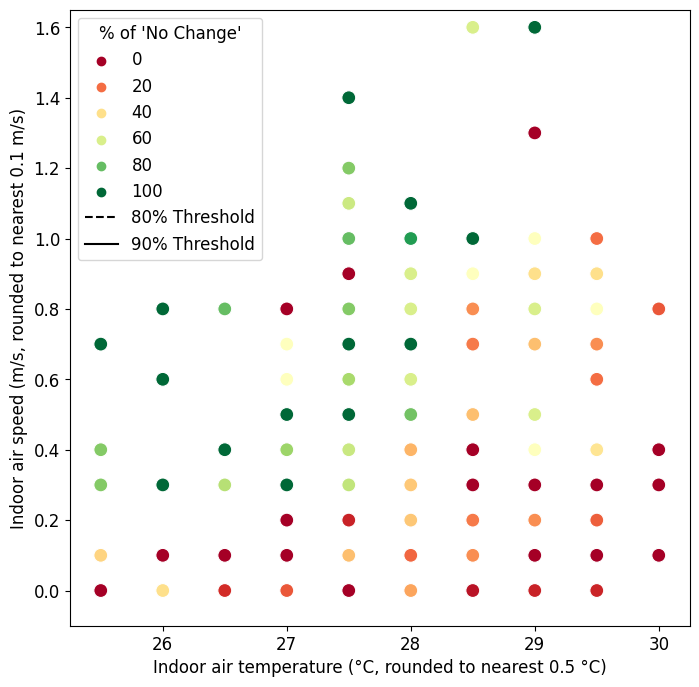

In [248]:
# Contour map for thermal preference based on indoor temperature and air velocity
# for NV condition
nv_data = data[data['Mode']=='NV'].reset_index(drop=True)
grouped = nv_data.groupby(['Indoor Temp (Rounded to Nearest 0.5)', 
                           'Air Velocity (Rounded to Nearest 0.1)'])['Thermal Preference'].value_counts(normalize=True).unstack(fill_value=0)
grouped = grouped * 100
grouped = grouped.reset_index()
grouped['% Uncomfortable'] = grouped['Cooler'] + grouped['Warmer']
grouped['% No Change'] = grouped['No Change']

# plot decision boundary for 80% comfort threshold
grouped['Comfort Threshold 80%'] = grouped['% No Change'].apply(lambda x: 1 if x >= 80 else 0)

# X = grouped[['Indoor Temp (Rounded to Nearest 0.5)',
#              'Air Velocity (Rounded to Nearest 0.1)']]
# Y = grouped['Comfort Threshold 80%']

plt.figure(figsize=(8,8))

## Fit the logistic regression model and return prediction results
fit_logreg_model(grouped, 'Comfort Threshold 80%')

# # Retrieve the model parameters.
# b = logreg.intercept_[0]
# w1, w2 = logreg.coef_.T
# # Calculate the intercept and gradient of the decision boundary.
# c = -b/w2
# m = -w1/w2

# # Plot the data and the classification with the decision boundary.
# xmin, xmax = 0, 1.6
# xd = np.array([xmin, xmax])
# yd = m*xd + c
# plt.plot(xd, yd, 'k', ls='--')


# plot decision boundary for 90% comfort threshold
grouped['Comfort Threshold 90%'] = grouped['% No Change'].apply(lambda x: 1 if x >= 90 else 0)

# X = grouped[['Indoor Temp (Rounded to Nearest 0.5)',
#              'Air Velocity (Rounded to Nearest 0.1)']]
# Y = grouped['Comfort Threshold 90%']

## Fit the logistic regression model and return prediction results
fit_logreg_model(grouped, 'Comfort Threshold 90%')

# # Retrieve the model parameters.
# b = logreg.intercept_[0]
# w1, w2 = logreg.coef_.T
# # Calculate the intercept and gradient of the decision boundary.
# c = -b/w2
# m = -w1/w2

# # Plot the data and the classification with the decision boundary.
# xmin, xmax = 0, 1.6
# xd = np.array([xmin, xmax])
# yd = m*xd + c
# plt.plot(xd, yd, 'k', ls='-')

# plot scatter plot
sns.scatterplot(data=grouped, 
                x='Indoor Temp (Rounded to Nearest 0.5)', 
                y='Air Velocity (Rounded to Nearest 0.1)', 
                hue='% No Change', 
                s=100, 
                palette='RdYlGn')
plt.xlabel('Indoor air temperature (°C, rounded to nearest 0.5 °C)')
plt.ylabel('Indoor air speed (m/s, rounded to nearest 0.1 m/s)')
plt.ylim(-0.1, 1.65)
plt.xlim(25.25, 30.25)

# Get the current legend handles and labels
handles, labels = plt.gca().get_legend_handles_labels()

# Manually add a new item to the legend
handles.append(Line2D([0], [0], color='black', linestyle='--'))
labels.append('80% Threshold')

handles.append(Line2D([0], [0], color='black', linestyle='-'))
labels.append('90% Threshold')

# Update the legend with the new items
# plt.legend(handles, labels, title="% of 'No Change'", loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend(handles, labels, title="% of 'No Change'")

plt.savefig('figures/thermal_preference_nv.png', dpi=600, bbox_inches='tight')
plt.show()



/Users/raymondlow/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/raymondlow/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


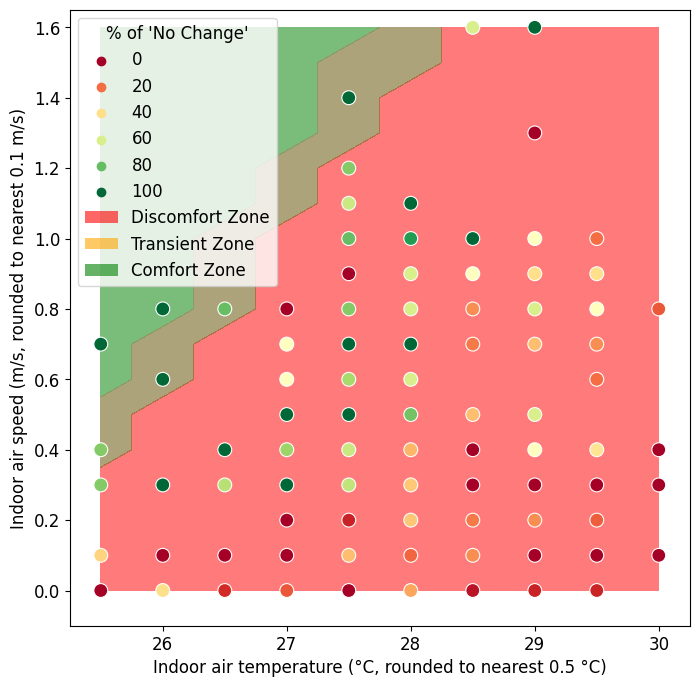

In [249]:
# Contour map for thermal preference based on indoor temperature and air velocity
# for NV condition
nv_data = data[data['Mode']=='NV'].reset_index(drop=True)
grouped = nv_data.groupby(['Indoor Temp (Rounded to Nearest 0.5)', 
                           'Air Velocity (Rounded to Nearest 0.1)'])['Thermal Preference'].value_counts(normalize=True).unstack(fill_value=0)
grouped = grouped * 100
grouped = grouped.reset_index()
grouped['% Uncomfortable'] = grouped['Cooler'] + grouped['Warmer']
grouped['% No Change'] = grouped['No Change']

# plot decision boundary for 80% comfort threshold
grouped['Comfort Threshold 80%'] = grouped['% No Change'].apply(lambda x: 1 if x >= 80 else 0)

X = grouped[['Indoor Temp (Rounded to Nearest 0.5)',
             'Air Velocity (Rounded to Nearest 0.1)']]
Y = grouped['Comfort Threshold 80%']

plt.figure(figsize=(8,8))

## Fit the SVM model
# logreg = SVC(class_weight='balanced')
logreg = LogisticRegression()
logreg.fit(X, Y)

temp_range = np.arange(25.5, 30.5, 0.5)
velo_range = np.arange(0, 1.7, 0.1)
xx, yy = np.meshgrid(temp_range, velo_range)

Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

contour_80 = plt.contourf(xx, yy, Z, levels=1, linestyles='-', colors=['red','green'], alpha=0.4)

# plot decision boundary for 90% comfort threshold
grouped['Comfort Threshold 90%'] = grouped['% No Change'].apply(lambda x: 1 if x >= 90 else 0)

X = grouped[['Indoor Temp (Rounded to Nearest 0.5)',
             'Air Velocity (Rounded to Nearest 0.1)']]
Y = grouped['Comfort Threshold 90%']

## Fit the SVM model
# logreg = SVC(class_weight='balanced')
logreg = LogisticRegression()
logreg.fit(X, Y)

temp_range = np.arange(25.5, 30.5, 0.5)
velo_range = np.arange(0, 1.7, 0.1)
xx, yy = np.meshgrid(temp_range, velo_range)

Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

contour_90 = plt.contourf(xx, yy, Z, levels=1, linestyles='-', colors=['red','green'], alpha=0.2)

# plot scatter plot
sns.scatterplot(data=grouped, 
                x='Indoor Temp (Rounded to Nearest 0.5)', 
                y='Air Velocity (Rounded to Nearest 0.1)', 
                hue='% No Change', 
                s=100, 
                palette='RdYlGn')
plt.xlabel('Indoor air temperature (°C, rounded to nearest 0.5 °C)')
plt.ylabel('Indoor air speed (m/s, rounded to nearest 0.1 m/s)')
plt.ylim(-0.1, 1.65)
plt.xlim(25.25, 30.25)

# Get the current legend handles and labels
handles, labels = plt.gca().get_legend_handles_labels()

# Manually add a new item to the legend
handles.append(Patch(facecolor='red', alpha=0.6))
labels.append('Discomfort Zone')
handles.append(Patch(facecolor='orange', alpha=0.6))
labels.append('Transient Zone')
handles.append(Patch(facecolor='green', alpha=0.6))
labels.append('Comfort Zone')

# Update the legend with the new items
# plt.legend(handles, labels, title="% of 'No Change'", loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend(handles, labels, title="% of 'No Change'")

plt.savefig('figures/thermal_preference_contour_nv.png', dpi=600, bbox_inches='tight')
plt.show()



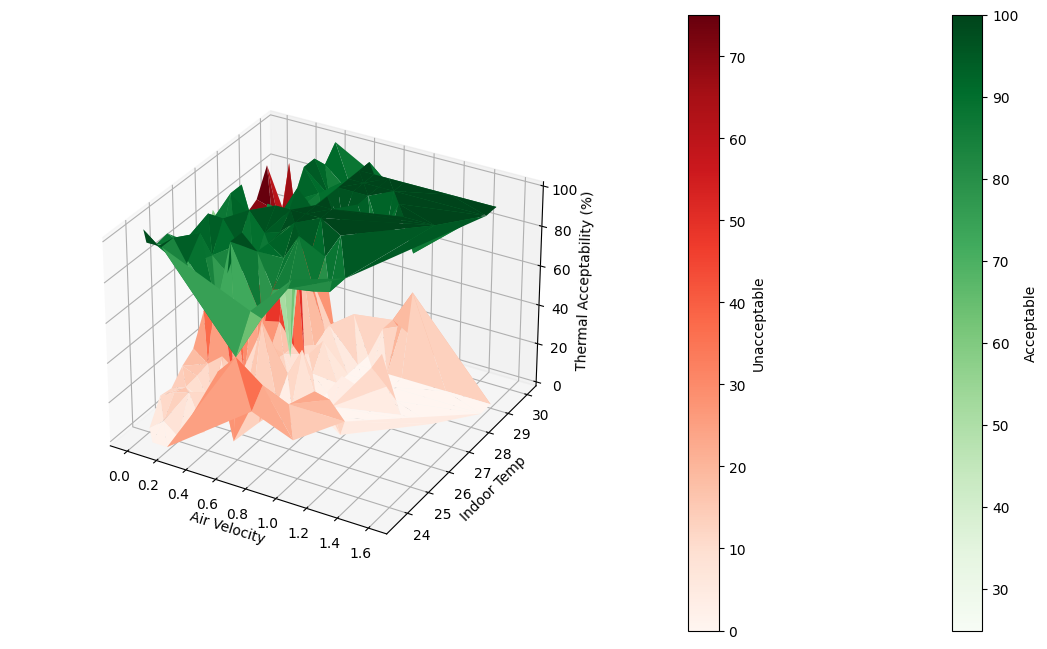

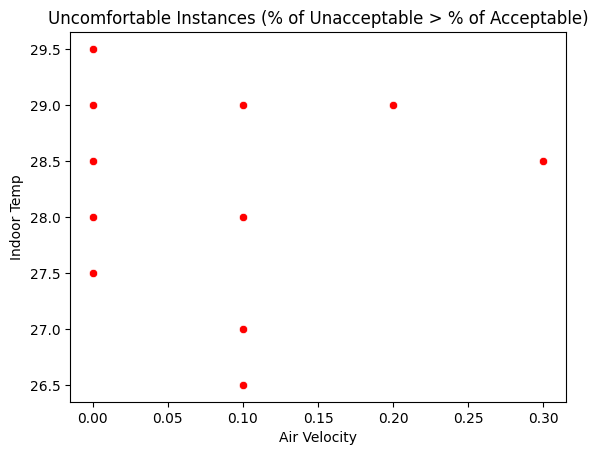

In [13]:
# Thermal Acceptability vs Indoor Temperature vs Air Velocity

grouped = data.groupby(['Indoor Temp (Rounded to Nearest 0.5)', 
                        'Air Velocity (Rounded to Nearest 0.1)'])['Thermal Acceptability'].value_counts(normalize=True).unstack(fill_value=0)
grouped = grouped * 100
grouped = grouped.reset_index()
grouped['Unacceptable > Acceptable'] = grouped.apply(lambda x: 1 if x['Unacceptable'] > x['Acceptable'] else 0, axis=1)

# Plot the 3D plot using Seaborn and Matplotlib
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect(aspect=None, zoom=0.8)

surf_acceptable = ax.plot_trisurf(grouped['Air Velocity (Rounded to Nearest 0.1)'], 
                                  grouped['Indoor Temp (Rounded to Nearest 0.5)'], 
                                  grouped['Acceptable'], cmap='Greens')
fig.colorbar(surf_acceptable, ax=ax, label='Acceptable')

surf_unacceptable = ax.plot_trisurf(grouped['Air Velocity (Rounded to Nearest 0.1)'], 
                                    grouped['Indoor Temp (Rounded to Nearest 0.5)'], 
                                    grouped['Unacceptable'], cmap='Reds')

fig.colorbar(surf_unacceptable, ax=ax, label='Unacceptable')

ax.set_zlabel('Thermal Acceptability (%)')
ax.set_ylabel('Indoor Temp')
ax.set_xlabel('Air Velocity')
plt.show()

# filter out scenarios where % of Unacceptable > % of Acceptable
plt.title('Uncomfortable Instances (% of Unacceptable > % of Acceptable)')
sns.scatterplot(data=grouped[grouped['Unacceptable > Acceptable'] == 1], 
                y='Indoor Temp (Rounded to Nearest 0.5)', 
                x='Air Velocity (Rounded to Nearest 0.1)', 
                color='red')
plt.ylabel('Indoor Temp')
plt.xlabel('Air Velocity')
plt.show()

Interpretation
- 3D figure shows how the occupants' thermal acceptability change based on different air velocities and indoor temperature
- In the case of thermal acceptability, it is less obvious but the times where the majority of the reported instances is "Unacceptable" compared to "Acceptable" happens when air velocity is low (<0.3m/s) and indoor temperature is high (>26.5 degree celsius)
- The only consistent result is that when the air velocity is at 0m/s, the majority of the thermal acceptability reported is "Unacceptable" when indoor temperature is greater than 27.5 degree celsius.
- It is also not easy to draw a boundary to clearly divide the "Comfortable" region from the "Uncomfortable" region.

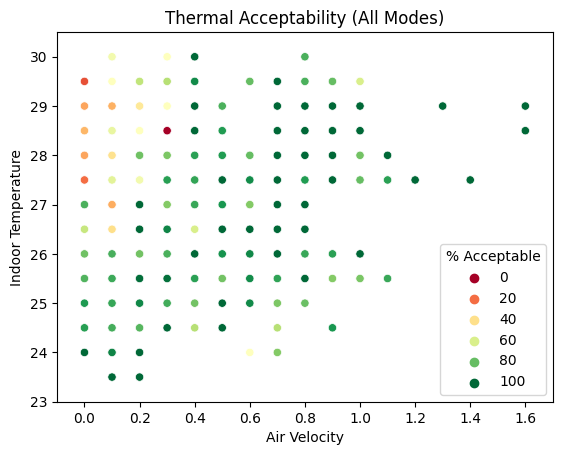

In [14]:
# Contour map for thermal acceptability based on indoor temperature and air velocity
# for all conditions
grouped = data.groupby(['Indoor Temp (Rounded to Nearest 0.5)', 
                        'Air Velocity (Rounded to Nearest 0.1)'])['Thermal Acceptability'].value_counts(normalize=True).unstack(fill_value=0)
grouped = grouped * 100
grouped = grouped.reset_index()
grouped['% Acceptable'] = grouped['Acceptable']

fig, ax = plt.subplots()
sns.scatterplot(data=grouped, 
                y='Indoor Temp (Rounded to Nearest 0.5)', 
                x='Air Velocity (Rounded to Nearest 0.1)', 
                hue='% Acceptable', palette='RdYlGn', ax=ax)

plt.title('Thermal Acceptability (All Modes)')
plt.ylabel('Indoor Temperature')
plt.xlabel('Air Velocity')
plt.xlim(-0.1, 1.7)
plt.ylim(23, 30.5)
plt.show()


In [ ]:
# # Contour map for thermal acceptability based on indoor temperature and air velocity
# # for NV condition
# nv_data = data[data['Mode']=='NV'].reset_index(drop=True)
# grouped = nv_data.groupby(['Indoor Temp (Rounded to Nearest 0.5)', 
#                            'Air Velocity (Rounded to Nearest 0.1)'])['Thermal Acceptability'].value_counts(normalize=True).unstack(fill_value=0)
# grouped = grouped * 100
# grouped = grouped.reset_index()
# grouped['% Acceptable'] = grouped['Acceptable']

# # plot decision boundary for 80% comfort threshold
# grouped['Comfort Threshold 80%'] = grouped['% Acceptable'].apply(lambda x: 1 if x >= 80 else 0)

# X = grouped[['Air Velocity (Rounded to Nearest 0.1)', 
#              'Indoor Temp (Rounded to Nearest 0.5)']]
# Y = grouped['Comfort Threshold 80%']

# ## Fit the logistic regression model
# logreg = LogisticRegression()
# logreg.fit(X, Y)

# temp_range = np.arange(25.5, 30.5, 0.5)
# velo_range = np.arange(0, 1.7, 0.1)
# xx, yy = np.meshgrid(velo_range, temp_range)

# Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
# Z = Z.reshape(xx.shape)

# plt.figure(figsize=(7,7))
# contour_80 = plt.contour(xx, yy, Z, levels=0, colors='black', linestyles='--')


# # plot decision boundary for 90% comfort threshold
# grouped['Comfort Threshold 90%'] = grouped['% Acceptable'].apply(lambda x: 1 if x >= 90 else 0)

# Y = grouped['Comfort Threshold 90%']

# ## Fit the logistic regression model
# logreg = LogisticRegression()
# logreg.fit(X, Y)

# Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
# Z = Z.reshape(xx.shape)

# contour_90 = plt.contour(xx, yy, Z, levels=0, colors='black', linestyles='-')

# # plot scatter plot
# sns.scatterplot(data=grouped, 
#                 y='Indoor Temp (Rounded to Nearest 0.5)', 
#                 x='Air Velocity (Rounded to Nearest 0.1)', 
#                 hue='% Acceptable', 
#                 s=100, 
#                 palette='RdYlGn')
# # plt.title('Thermal Acceptability (only NV)')
# plt.ylabel('Indoor temperature (°C, rounded to nearest 0.5 °C)')
# plt.xlabel('Air velocity (m/s, rounded to nearest 0.1 m/s)')
# plt.xlim(-0.1, 1.65)
# plt.ylim(25.25, 30.25)

# # Get the current legend handles and labels
# handles, labels = plt.gca().get_legend_handles_labels()

# # Manually add a new item to the legend
# handles.append(Line2D([0], [0], color='black', linestyle='--'))
# labels.append('80% Threshold')

# handles.append(Line2D([0], [0], color='black', linestyle='-'))
# labels.append('90% Threshold')

# # Update the legend with the new items
# # plt.legend(handles, labels, title='% of "Acceptable"', loc='center left', bbox_to_anchor=(1, 0.5))
# plt.legend(handles, labels, title='% of "Acceptable"')

# # plt.savefig('figures/thermal_acceptability_nv.png', dpi=600, bbox_inches='tight')
# plt.show()


In [ ]:
# Contour map for thermal acceptability based on indoor temperature and air velocity
# for NV condition
nv_data = data[data['Mode']=='NV'].reset_index(drop=True)
grouped = nv_data.groupby(['Indoor Temp (Rounded to Nearest 0.5)', 
                           'Air Velocity (Rounded to Nearest 0.1)'])['Thermal Acceptability'].value_counts(normalize=True).unstack(fill_value=0)
grouped = grouped * 100
grouped = grouped.reset_index()
grouped['% Acceptable'] = grouped['Acceptable']

# plot decision boundary for 80% comfort threshold
grouped['Comfort Threshold 80%'] = grouped['% Acceptable'].apply(lambda x: 1 if x >= 80 else 0)

# X = grouped[['Indoor Temp (Rounded to Nearest 0.5)',
#              'Air Velocity (Rounded to Nearest 0.1)']]
# Y = grouped['Comfort Threshold 80%']

plt.figure(figsize=(8,8))

## Fit the logistic regression model
# logreg = LogisticRegression()
# logreg.fit(X, Y)
## Fit the logistic regression model and return prediction results
fit_logreg_model(grouped, 'Comfort Threshold 80%')

# # Retrieve the model parameters.
# b = logreg.intercept_[0]
# w1, w2 = logreg.coef_.T
# # Calculate the intercept and gradient of the decision boundary.
# c = -b/w2
# m = -w1/w2

# # Plot the data and the classification with the decision boundary.
# xmin, xmax = 0, 1.6
# xd = np.array([xmin, xmax])
# yd = m*xd + c
# plt.plot(xd, yd, 'k', ls='--')


# plot decision boundary for 90% comfort threshold
grouped['Comfort Threshold 90%'] = grouped['% Acceptable'].apply(lambda x: 1 if x >= 90 else 0)

# X = grouped[['Air Velocity (Rounded to Nearest 0.1)', 
#              'Indoor Temp (Rounded to Nearest 0.5)']]
# Y = grouped['Comfort Threshold 90%']

# ## Fit the logistic regression model
# logreg = LogisticRegression()
# logreg.fit(X, Y)
## Fit the logistic regression model and return prediction results
fit_logreg_model(grouped, 'Comfort Threshold 90%')

# # Retrieve the model parameters.
# b = logreg.intercept_[0]
# w1, w2 = logreg.coef_.T
# # Calculate the intercept and gradient of the decision boundary.
# c = -b/w2
# m = -w1/w2

# # Plot the data and the classification with the decision boundary.
# xmin, xmax = 0, 1.6
# xd = np.array([xmin, xmax])
# yd = m*xd + c
# plt.plot(xd, yd, 'k', ls='-')

# plot scatter plot
sns.scatterplot(data=grouped, 
                x='Indoor Temp (Rounded to Nearest 0.5)', 
                y='Air Velocity (Rounded to Nearest 0.1)', 
                hue='% Acceptable', 
                s=100, 
                palette='RdYlGn')
plt.xlabel('Indoor air temperature (°C, rounded to nearest 0.5 °C)')
plt.ylabel('Indoor air speed (m/s, rounded to nearest 0.1 m/s)')
plt.ylim(-0.1, 1.65)
plt.xlim(25.25, 30.25)

# Get the current legend handles and labels
handles, labels = plt.gca().get_legend_handles_labels()

# Manually add a new item to the legend
handles.append(Line2D([0], [0], color='black', linestyle='--'))
labels.append('80% Threshold')

handles.append(Line2D([0], [0], color='black', linestyle='-'))
labels.append('90% Threshold')

# Update the legend with the new items
# plt.legend(handles, labels, title="% of 'Acceptable'", loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend(handles, labels, title="% of 'Acceptable'")

plt.savefig('figures/thermal_acceptability_nv.png', dpi=600, bbox_inches='tight')
plt.show()


In [ ]:
# Contour map for thermal acceptability based on indoor temperature and air velocity
# for NV condition
nv_data = data[data['Mode']=='NV'].reset_index(drop=True)
grouped = nv_data.groupby(['Indoor Temp (Rounded to Nearest 0.5)', 
                           'Air Velocity (Rounded to Nearest 0.1)'])['Thermal Acceptability'].value_counts(normalize=True).unstack(fill_value=0)
grouped = grouped * 100
grouped = grouped.reset_index()
grouped['% Acceptable'] = grouped['Acceptable']

# plot decision boundary for 80% comfort threshold
grouped['Comfort Threshold 80%'] = grouped['% Acceptable'].apply(lambda x: 1 if x >= 80 else 0)

X = grouped[['Indoor Temp (Rounded to Nearest 0.5)',
             'Air Velocity (Rounded to Nearest 0.1)']]
Y = grouped['Comfort Threshold 80%']

plt.figure(figsize=(8,8))

## Fit the logistic regression model
logreg = LogisticRegression()
logreg.fit(X, Y)

temp_range = np.arange(25.5, 30.5, 0.5)
velo_range = np.arange(0, 1.7, 0.1)
xx, yy = np.meshgrid(temp_range, velo_range)

Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

contour_80 = plt.contourf(xx, yy, Z, levels=1, linestyles='--', colors=['red','green'], alpha=0.4)

# plot decision boundary for 90% comfort threshold
grouped['Comfort Threshold 90%'] = grouped['% Acceptable'].apply(lambda x: 1 if x >= 90 else 0)

X = grouped[['Indoor Temp (Rounded to Nearest 0.5)',
             'Air Velocity (Rounded to Nearest 0.1)']]
Y = grouped['Comfort Threshold 90%']

## Fit logistic regression model
logreg = LogisticRegression()
logreg.fit(X, Y)

temp_range = np.arange(25.5, 30.5, 0.5)
velo_range = np.arange(0, 1.7, 0.1)
xx, yy = np.meshgrid(temp_range, velo_range)

Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

contour_90 = plt.contourf(xx, yy, Z, levels=1, linestyles='-', colors=['red','green'], alpha=0.2)

# plot scatter plot
sns.scatterplot(data=grouped, 
                x='Indoor Temp (Rounded to Nearest 0.5)', 
                y='Air Velocity (Rounded to Nearest 0.1)', 
                hue='% Acceptable', 
                s=100, 
                palette='RdYlGn')
plt.xlabel('Indoor air temperature (°C, rounded to nearest 0.5 °C)')
plt.ylabel('Indoor air speed (m/s, rounded to nearest 0.1 m/s)')
plt.ylim(-0.1, 1.65)
plt.xlim(25.25, 30.25)

# Get the current legend handles and labels
handles, labels = plt.gca().get_legend_handles_labels()

# Manually add a new item to the legend
handles.append(Patch(facecolor='red', alpha=0.6))
labels.append('Discomfort Zone')
handles.append(Patch(facecolor='orange', alpha=0.6))
labels.append('Transient Zone')
handles.append(Patch(facecolor='green', alpha=0.6))
labels.append('Comfort Zone')

# Update the legend with the new items
plt.legend(handles, labels, title="% of 'Acceptable'")

plt.savefig('figures/thermal_acceptability_contour_nv.png', dpi=600, bbox_inches='tight')
plt.show()



In [15]:
## Air Movement

Comfort Threshold 80%
              precision    recall  f1-score   support

           0       0.83      0.75      0.79        32
           1       0.86      0.91      0.88        55

    accuracy                           0.85        87
   macro avg       0.84      0.83      0.84        87
weighted avg       0.85      0.85      0.85        87

Comfort Threshold 90%
              precision    recall  f1-score   support

           0       0.75      0.81      0.78        48
           1       0.74      0.67      0.70        39

    accuracy                           0.75        87
   macro avg       0.75      0.74      0.74        87
weighted avg       0.75      0.75      0.75        87



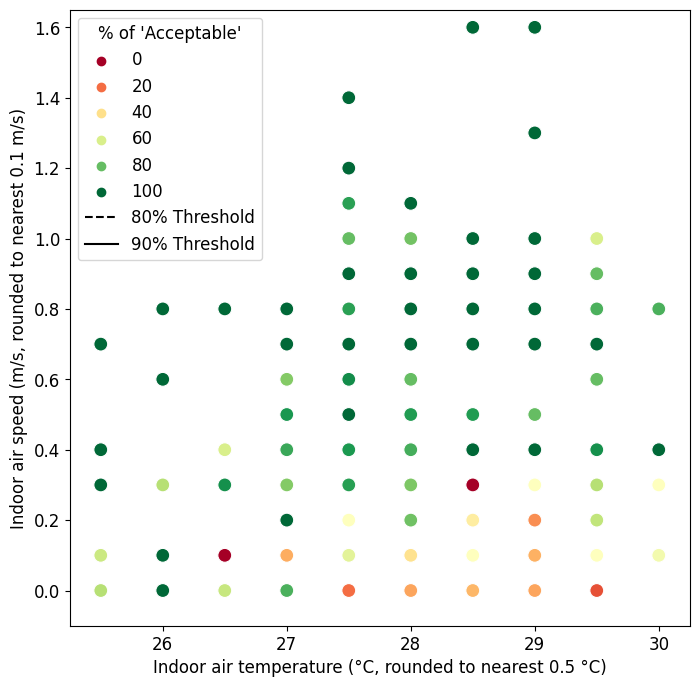

In [250]:
# Contour map for thermal acceptability based on indoor temperature and air velocity
# for NV condition
nv_data = data[data['Mode']=='NV'].reset_index(drop=True)
grouped = nv_data.groupby(['Indoor Temp (Rounded to Nearest 0.5)', 
                           'Air Velocity (Rounded to Nearest 0.1)'])['Thermal Acceptability'].value_counts(normalize=True).unstack(fill_value=0)
grouped = grouped * 100
grouped = grouped.reset_index()
grouped['% Acceptable'] = grouped['Acceptable']

# plot decision boundary for 80% comfort threshold
grouped['Comfort Threshold 80%'] = grouped['% Acceptable'].apply(lambda x: 1 if x >= 80 else 0)

# X = grouped[['Indoor Temp (Rounded to Nearest 0.5)',
#              'Air Velocity (Rounded to Nearest 0.1)']]
# Y = grouped['Comfort Threshold 80%']

plt.figure(figsize=(8,8))

## Fit the logistic regression model
# logreg = LogisticRegression()
# logreg.fit(X, Y)
## Fit the logistic regression model and return prediction results
fit_logreg_model(grouped, 'Comfort Threshold 80%')

# # Retrieve the model parameters.
# b = logreg.intercept_[0]
# w1, w2 = logreg.coef_.T
# # Calculate the intercept and gradient of the decision boundary.
# c = -b/w2
# m = -w1/w2

# # Plot the data and the classification with the decision boundary.
# xmin, xmax = 0, 1.6
# xd = np.array([xmin, xmax])
# yd = m*xd + c
# plt.plot(xd, yd, 'k', ls='--')


# plot decision boundary for 90% comfort threshold
grouped['Comfort Threshold 90%'] = grouped['% Acceptable'].apply(lambda x: 1 if x >= 90 else 0)

# X = grouped[['Air Velocity (Rounded to Nearest 0.1)', 
#              'Indoor Temp (Rounded to Nearest 0.5)']]
# Y = grouped['Comfort Threshold 90%']

# ## Fit the logistic regression model
# logreg = LogisticRegression()
# logreg.fit(X, Y)
## Fit the logistic regression model and return prediction results
fit_logreg_model(grouped, 'Comfort Threshold 90%')

# # Retrieve the model parameters.
# b = logreg.intercept_[0]
# w1, w2 = logreg.coef_.T
# # Calculate the intercept and gradient of the decision boundary.
# c = -b/w2
# m = -w1/w2

# # Plot the data and the classification with the decision boundary.
# xmin, xmax = 0, 1.6
# xd = np.array([xmin, xmax])
# yd = m*xd + c
# plt.plot(xd, yd, 'k', ls='-')

# plot scatter plot
sns.scatterplot(data=grouped, 
                x='Indoor Temp (Rounded to Nearest 0.5)', 
                y='Air Velocity (Rounded to Nearest 0.1)', 
                hue='% Acceptable', 
                s=100, 
                palette='RdYlGn')
plt.xlabel('Indoor air temperature (°C, rounded to nearest 0.5 °C)')
plt.ylabel('Indoor air speed (m/s, rounded to nearest 0.1 m/s)')
plt.ylim(-0.1, 1.65)
plt.xlim(25.25, 30.25)

# Get the current legend handles and labels
handles, labels = plt.gca().get_legend_handles_labels()

# Manually add a new item to the legend
handles.append(Line2D([0], [0], color='black', linestyle='--'))
labels.append('80% Threshold')

handles.append(Line2D([0], [0], color='black', linestyle='-'))
labels.append('90% Threshold')

# Update the legend with the new items
# plt.legend(handles, labels, title="% of 'Acceptable'", loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend(handles, labels, title="% of 'Acceptable'")

plt.savefig('figures/thermal_acceptability_nv.png', dpi=600, bbox_inches='tight')
plt.show()


/Users/raymondlow/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/raymondlow/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


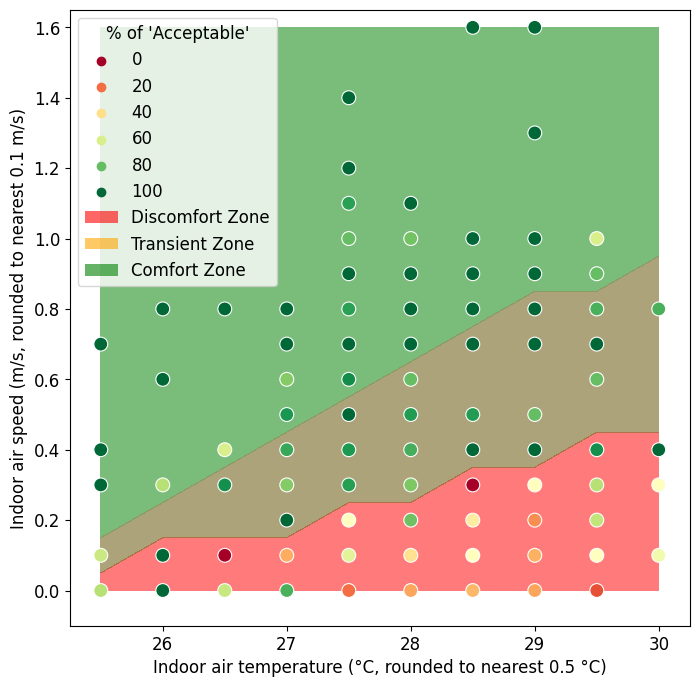

In [251]:
# Contour map for thermal acceptability based on indoor temperature and air velocity
# for NV condition
nv_data = data[data['Mode']=='NV'].reset_index(drop=True)
grouped = nv_data.groupby(['Indoor Temp (Rounded to Nearest 0.5)', 
                           'Air Velocity (Rounded to Nearest 0.1)'])['Thermal Acceptability'].value_counts(normalize=True).unstack(fill_value=0)
grouped = grouped * 100
grouped = grouped.reset_index()
grouped['% Acceptable'] = grouped['Acceptable']

# plot decision boundary for 80% comfort threshold
grouped['Comfort Threshold 80%'] = grouped['% Acceptable'].apply(lambda x: 1 if x >= 80 else 0)

X = grouped[['Indoor Temp (Rounded to Nearest 0.5)',
             'Air Velocity (Rounded to Nearest 0.1)']]
Y = grouped['Comfort Threshold 80%']

plt.figure(figsize=(8,8))

## Fit the logistic regression model
logreg = LogisticRegression()
logreg.fit(X, Y)

temp_range = np.arange(25.5, 30.5, 0.5)
velo_range = np.arange(0, 1.7, 0.1)
xx, yy = np.meshgrid(temp_range, velo_range)

Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

contour_80 = plt.contourf(xx, yy, Z, levels=1, linestyles='--', colors=['red','green'], alpha=0.4)

# plot decision boundary for 90% comfort threshold
grouped['Comfort Threshold 90%'] = grouped['% Acceptable'].apply(lambda x: 1 if x >= 90 else 0)

X = grouped[['Indoor Temp (Rounded to Nearest 0.5)',
             'Air Velocity (Rounded to Nearest 0.1)']]
Y = grouped['Comfort Threshold 90%']

## Fit logistic regression model
logreg = LogisticRegression()
logreg.fit(X, Y)

temp_range = np.arange(25.5, 30.5, 0.5)
velo_range = np.arange(0, 1.7, 0.1)
xx, yy = np.meshgrid(temp_range, velo_range)

Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

contour_90 = plt.contourf(xx, yy, Z, levels=1, linestyles='-', colors=['red','green'], alpha=0.2)

# plot scatter plot
sns.scatterplot(data=grouped, 
                x='Indoor Temp (Rounded to Nearest 0.5)', 
                y='Air Velocity (Rounded to Nearest 0.1)', 
                hue='% Acceptable', 
                s=100, 
                palette='RdYlGn')
plt.xlabel('Indoor air temperature (°C, rounded to nearest 0.5 °C)')
plt.ylabel('Indoor air speed (m/s, rounded to nearest 0.1 m/s)')
plt.ylim(-0.1, 1.65)
plt.xlim(25.25, 30.25)

# Get the current legend handles and labels
handles, labels = plt.gca().get_legend_handles_labels()

# Manually add a new item to the legend
handles.append(Patch(facecolor='red', alpha=0.6))
labels.append('Discomfort Zone')
handles.append(Patch(facecolor='orange', alpha=0.6))
labels.append('Transient Zone')
handles.append(Patch(facecolor='green', alpha=0.6))
labels.append('Comfort Zone')

# Update the legend with the new items
plt.legend(handles, labels, title="% of 'Acceptable'")

plt.savefig('figures/thermal_acceptability_contour_nv.png', dpi=600, bbox_inches='tight')
plt.show()



In [17]:
## Air Movement

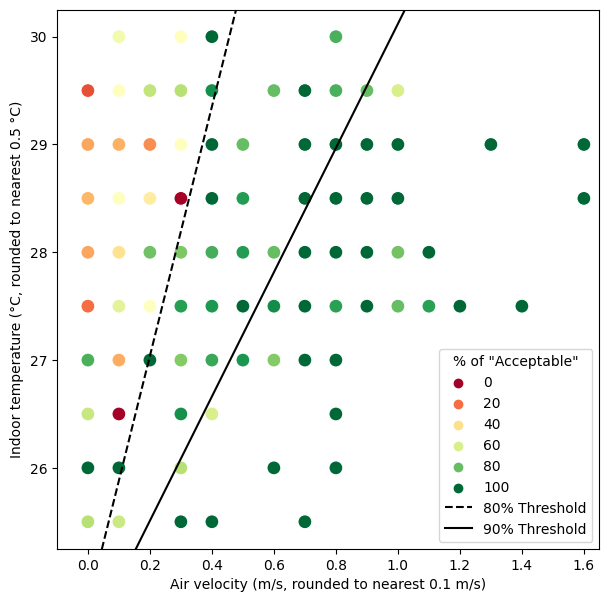

In [18]:
# Contour map for thermal acceptability based on indoor temperature and air velocity
# for NV condition
nv_data = data[data['Mode']=='NV'].reset_index(drop=True)
grouped = nv_data.groupby(['Indoor Temp (Rounded to Nearest 0.5)', 
                           'Air Velocity (Rounded to Nearest 0.1)'])['Thermal Acceptability'].value_counts(normalize=True).unstack(fill_value=0)
grouped = grouped * 100
grouped = grouped.reset_index()
grouped['% Acceptable'] = grouped['Acceptable']

# plot decision boundary for 80% comfort threshold
grouped['Comfort Threshold 80%'] = grouped['% Acceptable'].apply(lambda x: 1 if x >= 80 else 0)

X = grouped[['Air Velocity (Rounded to Nearest 0.1)', 
             'Indoor Temp (Rounded to Nearest 0.5)']]
Y = grouped['Comfort Threshold 80%']

plt.figure(figsize=(7,7))

## Fit the logistic regression model
logreg = LogisticRegression()
logreg.fit(X, Y)

# Retrieve the model parameters.
b = logreg.intercept_[0]
w1, w2 = logreg.coef_.T
# Calculate the intercept and gradient of the decision boundary.
c = -b/w2
m = -w1/w2

# Plot the data and the classification with the decision boundary.
xmin, xmax = 0, 1.6
xd = np.array([xmin, xmax])
yd = m*xd + c
plt.plot(xd, yd, 'k', ls='--')


# plot decision boundary for 90% comfort threshold
grouped['Comfort Threshold 90%'] = grouped['% Acceptable'].apply(lambda x: 1 if x >= 90 else 0)

X = grouped[['Air Velocity (Rounded to Nearest 0.1)', 
             'Indoor Temp (Rounded to Nearest 0.5)']]
Y = grouped['Comfort Threshold 90%']

## Fit the logistic regression model
logreg = LogisticRegression()
logreg.fit(X, Y)

# Retrieve the model parameters.
b = logreg.intercept_[0]
w1, w2 = logreg.coef_.T
# Calculate the intercept and gradient of the decision boundary.
c = -b/w2
m = -w1/w2

# Plot the data and the classification with the decision boundary.
xmin, xmax = 0, 1.6
xd = np.array([xmin, xmax])
yd = m*xd + c
plt.plot(xd, yd, 'k', ls='-')


# # plot decision boundary for 80% comfort threshold
# grouped['Comfort Threshold 80%'] = grouped['% Acceptable'].apply(lambda x: 1 if x >= 85 else 0)

# X = grouped[['Air Velocity (Rounded to Nearest 0.1)', 
#              'Indoor Temp (Rounded to Nearest 0.5)']]
# Y = grouped['Comfort Threshold 80%']

# ## Fit the logistic regression model
# logreg = LogisticRegression()
# logreg.fit(X, Y)

# temp_range = np.arange(25.5, 30.5, 0.5)
# velo_range = np.arange(0, 1.7, 0.1)
# xx, yy = np.meshgrid(velo_range, temp_range)

# Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
# Z = Z.reshape(xx.shape)

# plt.figure(figsize=(7,7))
# contour_80 = plt.contour(xx, yy, Z, levels=0, colors='black', linestyles='--')


# # plot decision boundary for 90% comfort threshold
# grouped['Comfort Threshold 90%'] = grouped['% Acceptable'].apply(lambda x: 1 if x >= 90 else 0)

# Y = grouped['Comfort Threshold 90%']

# ## Fit the logistic regression model
# logreg = LogisticRegression()
# logreg.fit(X, Y)

# Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
# Z = Z.reshape(xx.shape)

# contour_90 = plt.contour(xx, yy, Z, levels=0, colors='black', linestyles='-')

# plot scatter plot
sns.scatterplot(data=grouped, 
                y='Indoor Temp (Rounded to Nearest 0.5)', 
                x='Air Velocity (Rounded to Nearest 0.1)', 
                hue='% Acceptable', 
                s=100, 
                palette='RdYlGn')
# plt.title('Thermal Acceptability (only NV)')
plt.ylabel('Indoor temperature (°C, rounded to nearest 0.5 °C)')
plt.xlabel('Air velocity (m/s, rounded to nearest 0.1 m/s)')
plt.xlim(-0.1, 1.65)
plt.ylim(25.25, 30.25)

# Get the current legend handles and labels
handles, labels = plt.gca().get_legend_handles_labels()

# Manually add a new item to the legend
handles.append(Line2D([0], [0], color='black', linestyle='--'))
labels.append('80% Threshold')

handles.append(Line2D([0], [0], color='black', linestyle='-'))
labels.append('90% Threshold')

# Update the legend with the new items
# plt.legend(handles, labels, title='% of "Acceptable"', loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend(handles, labels, title='% of "Acceptable"')

# plt.savefig('figures/thermal_acceptability_nv.png', dpi=600, bbox_inches='tight')
plt.show()


## Air Movement

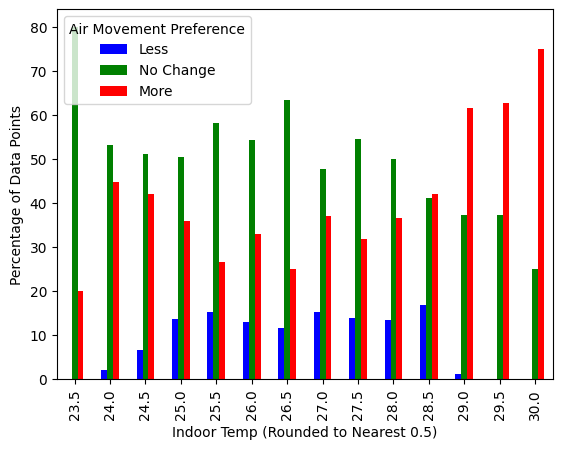

In [19]:
# Air Movement Preference vs Indoor Temperature (rounded to nearest 0.5)
grouped = data.groupby('Indoor Temp (Rounded to Nearest 0.5)')['Air Movement Preference'].value_counts(normalize=True).unstack(fill_value=0)
grouped = grouped * 100

# Plot the results on the same graph
colors = ['blue', 'green', 'red']
grouped.plot.bar(y=['Less', 'No Change', 'More'], color=colors)
plt.ylabel("Percentage of Data Points")
plt.show()

Interpretation
- Percentage of instances where people reported a preference for "More" air movement (represented by red bars) increases as the indoor temperature increases. Peaks at 30 degree celsius. This make sense as more air movement within the room can aid in reducing the occupants' body temperature through evaporation of their sweat.
- Percentage of instances where people reported a preference for "No Change" in air movement (represented by green bars) peaks at 23.5 degree celsius and generally decreases when indoor temperature continues to increase.
- Percentage of instances where people reported a preference for "Less" air movement (represented by blue bars) is higher at room temperature (25-28.5 degree celsius) but lower at lower (<24 degree celsius) and higher (>28.5 degree celsius) indoor temperatures.
- The flip in air movement preferences from majority "No Change" to majority "More" happens at around 28.5 degree celsius

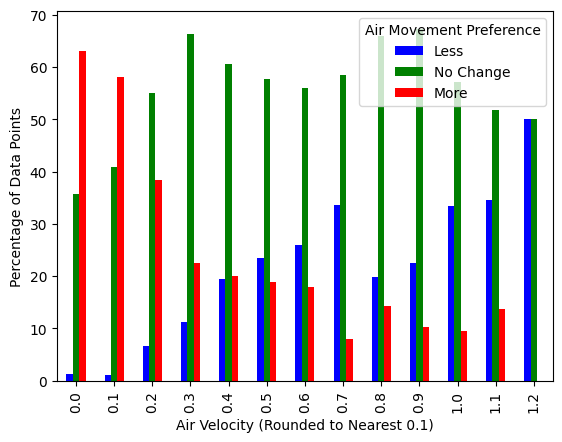

In [20]:
# Air Movement Preference vs Air Velocity (rounded to nearest 0.1)
grouped = data.groupby('Air Velocity (Rounded to Nearest 0.1)')['Air Movement Preference'].value_counts(normalize=True).unstack(fill_value=0)
grouped = grouped * 100
grouped = grouped.iloc[:13]

# Plot the results on the same graph
colors = ['blue', 'green', 'red']
grouped.plot.bar(y=['Less', 'No Change', 'More'], color=colors)
plt.ylabel("Percentage of Data Points")
plt.show()

Interpretation
- Percentage of instances where people reported a preference for "More" air movement (represented by red bars) generally decreases as the air velocity increases.
- Percentage of instances where people reported a preference for "No Change" in air movement (represented by green bars) generally increases when air velocity increases.
- Percentage of instances where people reported a preference for a "Less" air movement (represented by blue bars) increases as the air velocity increases.
- The flip in the air movement preference from majority "More" to majority "No Change" happens when air velocity increases beyond 0.2m/s

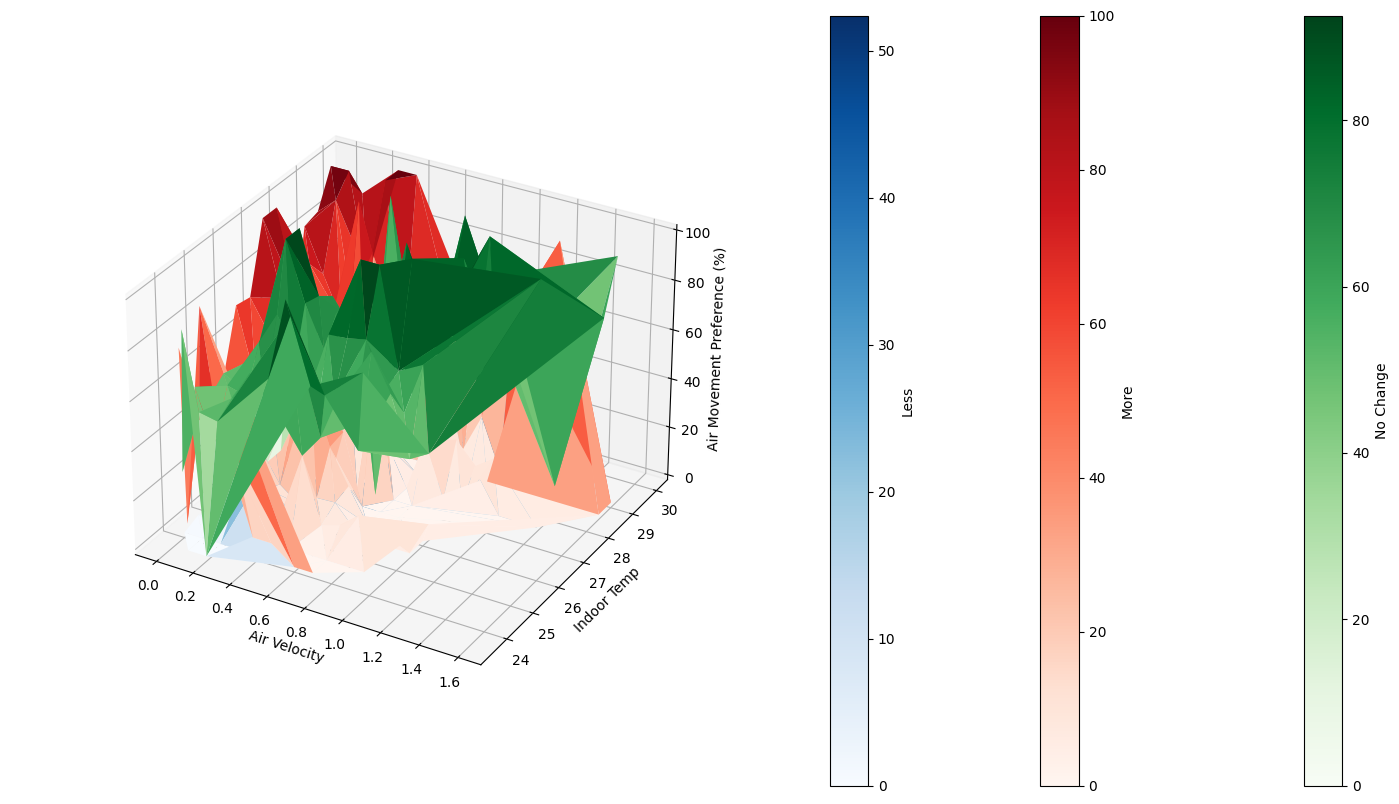

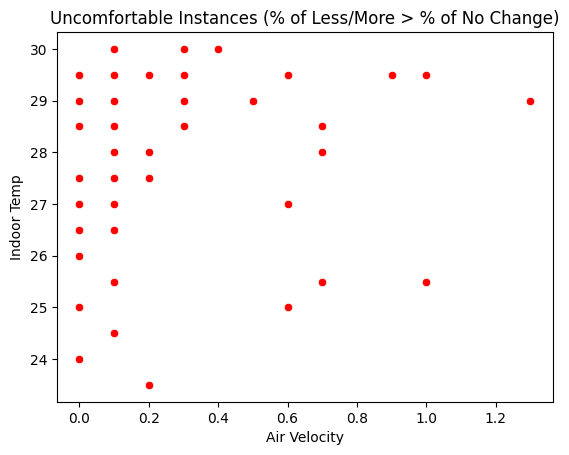

In [21]:
# Air Movement Preference vs Indoor Temperature vs Air Velocity

grouped = data.groupby(['Indoor Temp (Rounded to Nearest 0.5)', 
                        'Air Velocity (Rounded to Nearest 0.1)'])['Air Movement Preference'].value_counts(normalize=True).unstack(fill_value=0)
grouped = grouped * 100
grouped = grouped.reset_index()
grouped['Less/More > No Change'] = grouped.apply(lambda x: 1 
                                                if (x['Less'] > x['No Change'] or x['More'] > x['No Change']) 
                                                else 0, axis=1)

# # Plot the 3D plot using Seaborn and Matplotlib
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect(aspect=None, zoom=0.8)

surf_nochange = ax.plot_trisurf(grouped['Air Velocity (Rounded to Nearest 0.1)'], 
                                    grouped['Indoor Temp (Rounded to Nearest 0.5)'], 
                                    grouped['No Change'], cmap='Greens')
fig.colorbar(surf_nochange, ax=ax, label='No Change')

surf_more = ax.plot_trisurf(grouped['Air Velocity (Rounded to Nearest 0.1)'], 
                                  grouped['Indoor Temp (Rounded to Nearest 0.5)'], 
                                  grouped['More'], cmap='Reds')
fig.colorbar(surf_more, ax=ax, label='More')

surf_less = ax.plot_trisurf(grouped['Air Velocity (Rounded to Nearest 0.1)'], 
                                  grouped['Indoor Temp (Rounded to Nearest 0.5)'], 
                                  grouped['Less'], cmap='Blues')
fig.colorbar(surf_less, ax=ax, label='Less')

ax.set_zlabel('Air Movement Preference (%)')
ax.set_ylabel('Indoor Temp')
ax.set_xlabel('Air Velocity')
plt.show()

# filter out scenarios where % of Less / More > % of No Change
plt.title('Uncomfortable Instances (% of Less/More > % of No Change)')
sns.scatterplot(data=grouped[grouped['Less/More > No Change'] == 1], 
                y='Indoor Temp (Rounded to Nearest 0.5)', 
                x='Air Velocity (Rounded to Nearest 0.1)',
                color='red')
plt.ylabel('Indoor Temp')
plt.xlabel('Air Velocity')
plt.show()


Interpretation
- 3D figure shows how the occupants' air movement preferences change based on different air velocities and indoor temperature
- There are very few occurences (only 5 out of 39) when the occupants are uncomfortable where the majority of the reported air movement preferences is "More" as compared to "Less". This means that occupants are more likely to report that they want air movement in the room to be increased as compared to wanting the air movement to be decreased when they are uncomfortable. This could be due to the occupants' ability to reduce the air movement experienced by putting on a jacket. However, there is little they can do to increase the amount of air movement experienced. 
- The time where the majority of the instances reported the need for "More" air movement (over "No Change") happens when the air velocity is low (<0.4m/s) and when indoor temperature is high (>25 degree celsius). 
- Based on the scatter plot, we can observe that occupants starts to feel uncomfortable when temperature raises to around 24 degree celsius and air velocity is low (still comfortable at higher air velocities). However, as the indoor temperature continues to raise, occupants start reporting that they are uncomfortable even at high air velocities.
- From this, we can draw a diagonal boundary upwards from left to right to divide between the "Comfortable" region (below the boundary) from the "Uncomfortable" region (above the boundary). To determine an optimal setting between temperature set point (which affects indoor temperature) and fan speed (which affects air velocity), you can consider the energy consumption patterns along this boundary and identify the point where energy consumption is lowest. This boundary can be combined with the boundary line drawn for thermal preference so that we can obtain an optimal set point and fan speed that accounts for thermal preference, air movement preference, indoor temperature, air velocity and energy consumption.